In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose #splitting TS into components
from sklearn.metrics import mean_squared_error #calculated rmse
from math import sqrt

<Axes: >

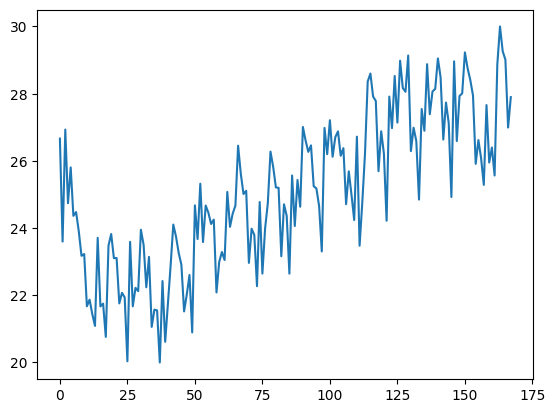

In [3]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='birth')
df.BirthRate.plot() #plotting the time series

In [4]:
df_train = df.iloc[:144] #splitting dataset, 12 years to create model
df_test = df.iloc[144:] #2 years data to test the model

In [5]:
df_train.shape

(144, 1)

In [6]:
df_test.shape

(24, 1)

<Axes: >

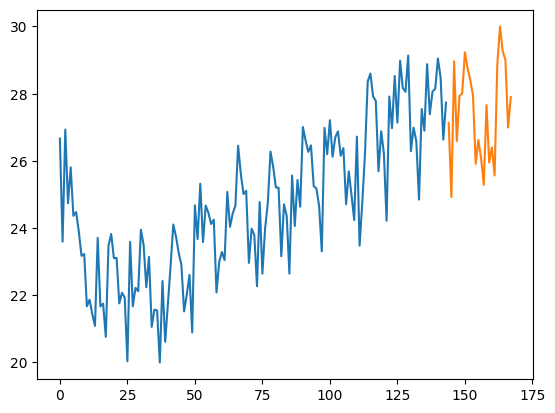

In [7]:
df_train.BirthRate.plot()
df_test.BirthRate.plot()

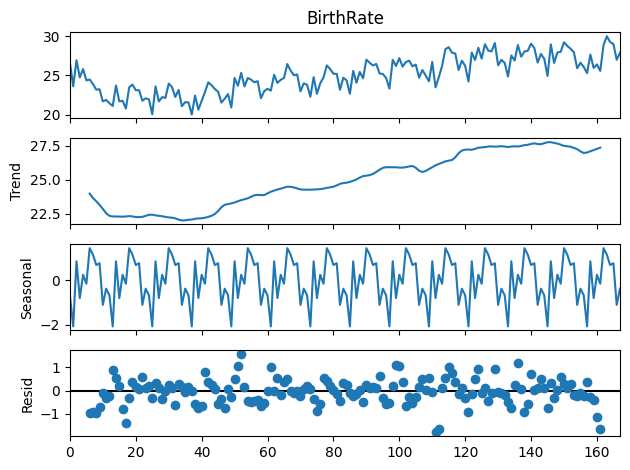

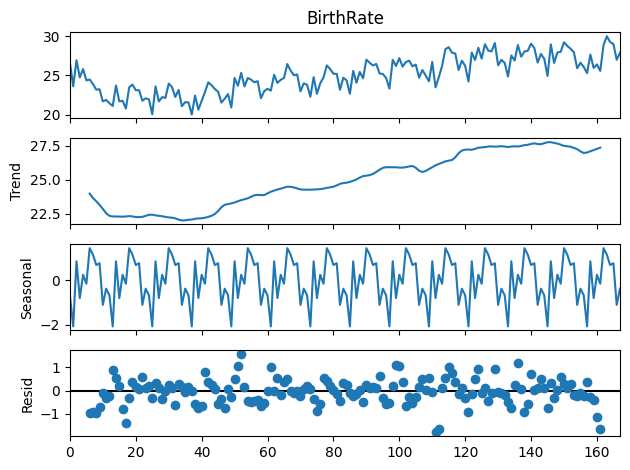

In [9]:
res = statsmodels.tsa.seasonal.seasonal_decompose(df.BirthRate,period=12) 
res.plot() #to view the components of time series

In [10]:
df_train.tail()

,BirthRate
139,28.141
140,29.048
141,28.484
142,26.634
143,27.735


# Naive Method

- last value of predictor will take as a predicted value for all the next future event.

In [12]:
dd = np.asarray(df_train.BirthRate)
y_hat = df_test.copy()
y_hat['naive'] = dd[len(dd)-1] #to get the last value

In [13]:
y_hat.head()

,BirthRate,naive
144,27.132,27.735
145,24.924,27.735
146,28.963,27.735
147,26.589,27.735
148,27.931,27.735


In [14]:
y_hat.tail()

,BirthRate,naive
163,30.000,27.735
164,29.261,27.735
165,29.012,27.735
166,26.992,27.735
167,27.897,27.735


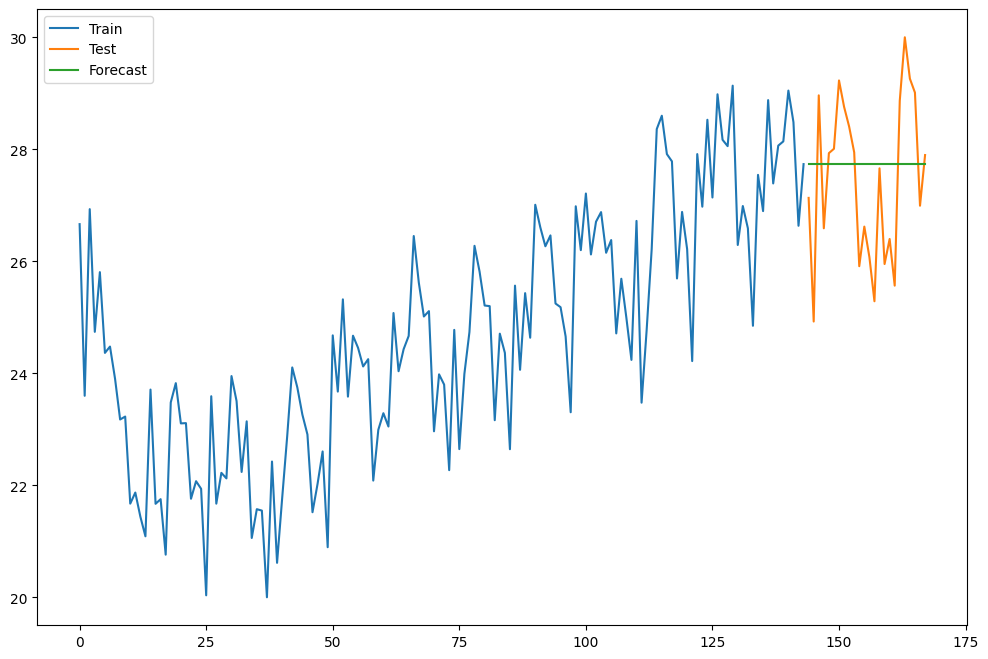

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat.naive,label='Forecast')
plt.legend()

In [19]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat.naive))
rms

1.4277309211939526

# Simple Average Method

In [20]:
y_hat = df_test.copy()
y_hat_avg = df_test.copy()
y_hat_avg['MeanForecast'] = df_train['BirthRate'].mean()

In [21]:
y_hat_avg.head()

,BirthRate,MeanForecast
144,27.132,24.656833
145,24.924,24.656833
146,28.963,24.656833
147,26.589,24.656833
148,27.931,24.656833


In [22]:
y_hat_avg.tail()

,BirthRate,MeanForecast
163,30.000,24.656833
164,29.261,24.656833
165,29.012,24.656833
166,26.992,24.656833
167,27.897,24.656833


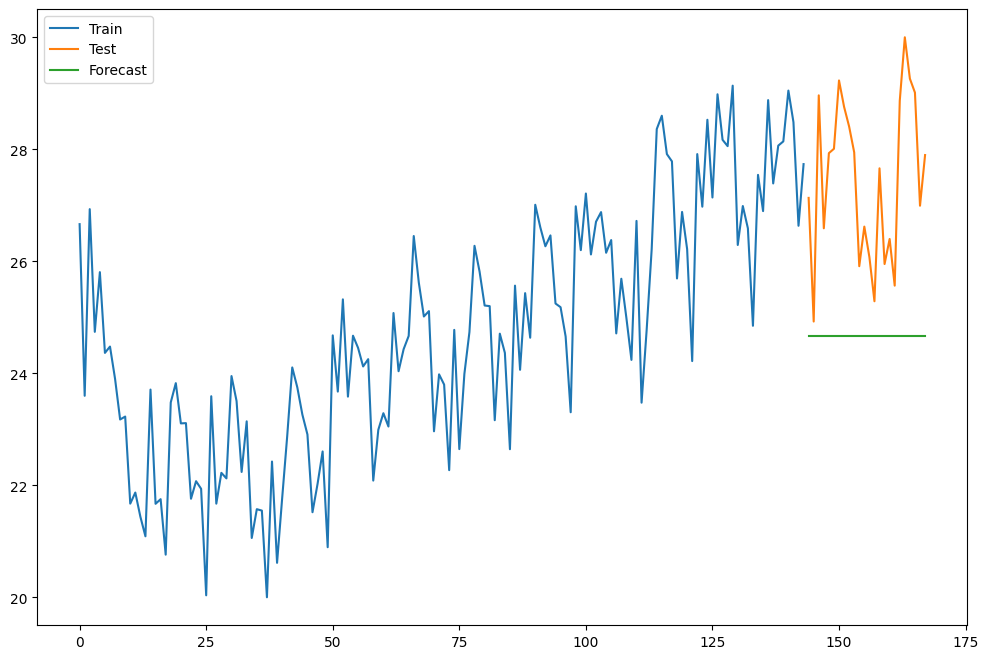

In [24]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat_avg.MeanForecast,label='Forecast')
plt.legend()

In [25]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat_avg.MeanForecast))
rms #rms value is high because the forecast value is below than where it should be

3.147657647627305

# Moving Average

- We are taking 

In [27]:
y_hat_avg['MovAvgForecast'] = df_train['BirthRate'].rolling(12).mean().iloc[-1]

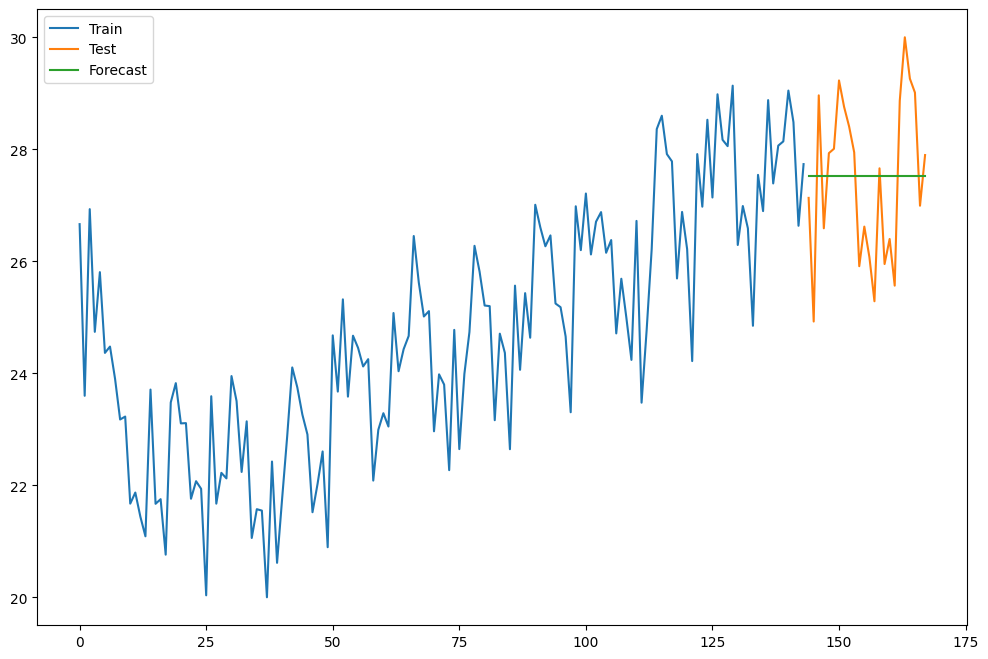

In [28]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat_avg.MovAvgForecast,label='Forecast')
plt.legend()

In [29]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat_avg.MovAvgForecast))
rms

1.4044810849760687

# Weighted Moving Average

In [30]:
y_hat_avg

,BirthRate,MeanForecast,MovAvgForecast
144,27.132,24.656833,27.520917
145,24.924,24.656833,27.520917
146,28.963,24.656833,27.520917
147,26.589,24.656833,27.520917
148,27.931,24.656833,27.520917
149,28.009,24.656833,27.520917
150,29.229,24.656833,27.520917
151,28.759,24.656833,27.520917
152,28.405,24.656833,27.520917
153,27.945,24.656833,27.520917


In [31]:
x = df_train['BirthRate'].iloc[-12:]

In [32]:
wt_sum = 0
denom = 0
for ctr in range(len(x)):
    wt_sum = wt_sum + x.iloc[ctr]*(ctr+1)
    denom = denom + (ctr+1)
wt_avg = wt_sum/denom

In [33]:
y_hat_avg['WtMovAvgForecast'] = wt_avg

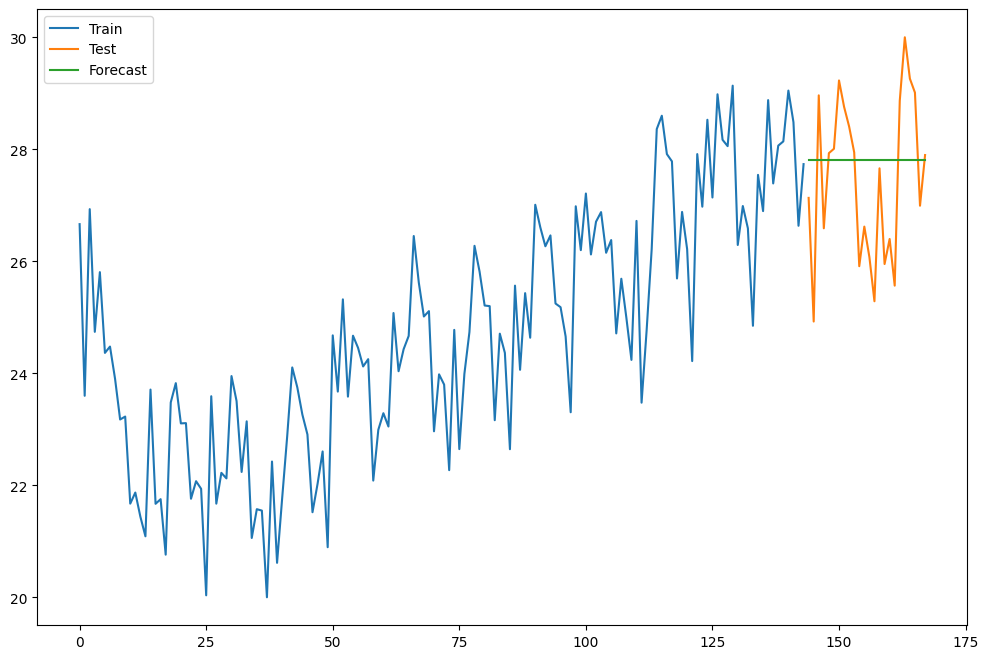

In [34]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat_avg.WtMovAvgForecast,label='Forecast')
plt.legend()

In [35]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat_avg.WtMovAvgForecast))
rms

1.442418630947116

# Simple Exponential Smoothing

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [42]:
mod1 = SimpleExpSmoothing(np.asarray(df_train.BirthRate)).fit(smoothing_level = 0.8)
y_hat_avg['SES'] = mod1.forecast(len(df_test))

C:\Users\vaibh\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


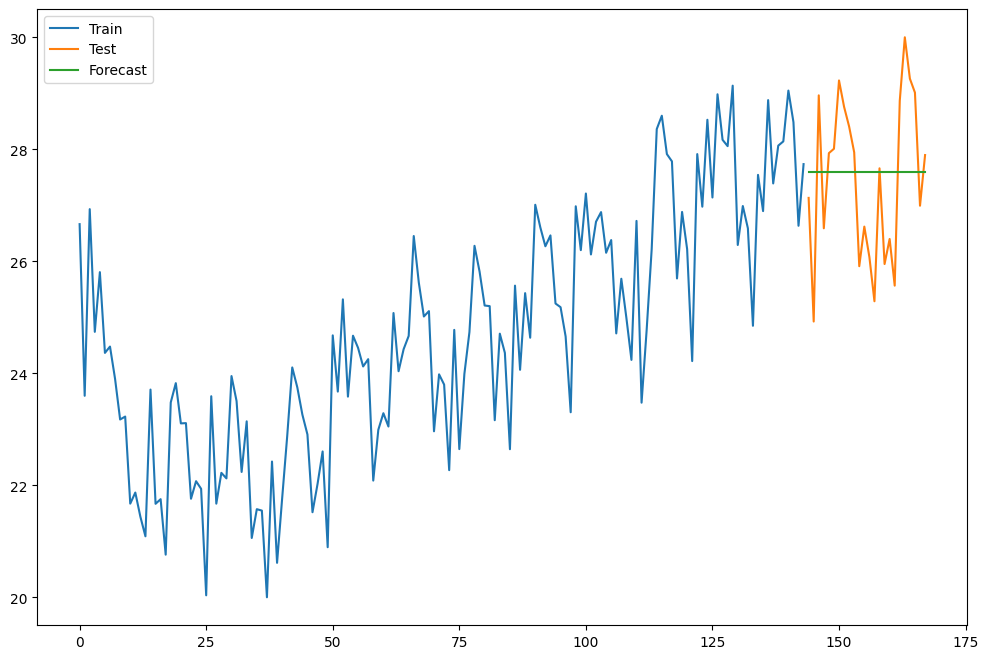

In [44]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat_avg.SES,label='Forecast')
plt.legend()

In [45]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat_avg.SES))
rms

1.4086237555629835

# Holt's Linear Trend Method

In [48]:
mod2 = Holt(np.asarray(df_train.BirthRate)).fit(smoothing_level = 0.6)
y_hat_avg['HoltLinear'] = mod2.forecast(len(df_test))

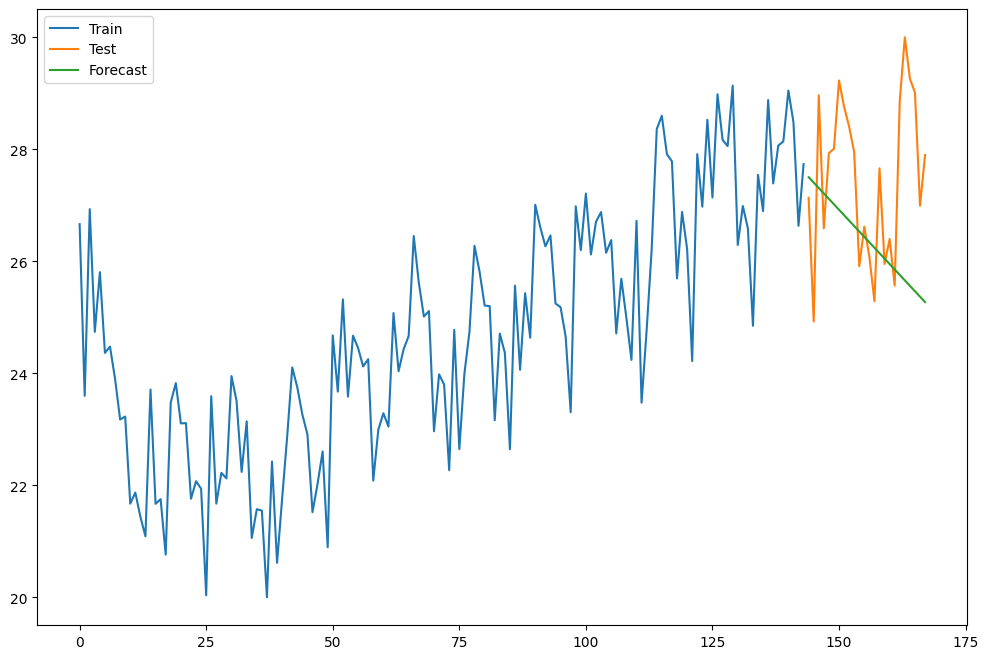

In [49]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat_avg.HoltLinear,label='Forecast')
plt.legend()

In [50]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat_avg.HoltLinear))
rms

1.9683011091659781

# Holt's Winter's Method

In [54]:
mod3 = ExponentialSmoothing(np.asarray(df_train.BirthRate), seasonal_periods=12).fit()
y_hat_avg['HoltWinter'] = mod3.forecast(len(df_test))

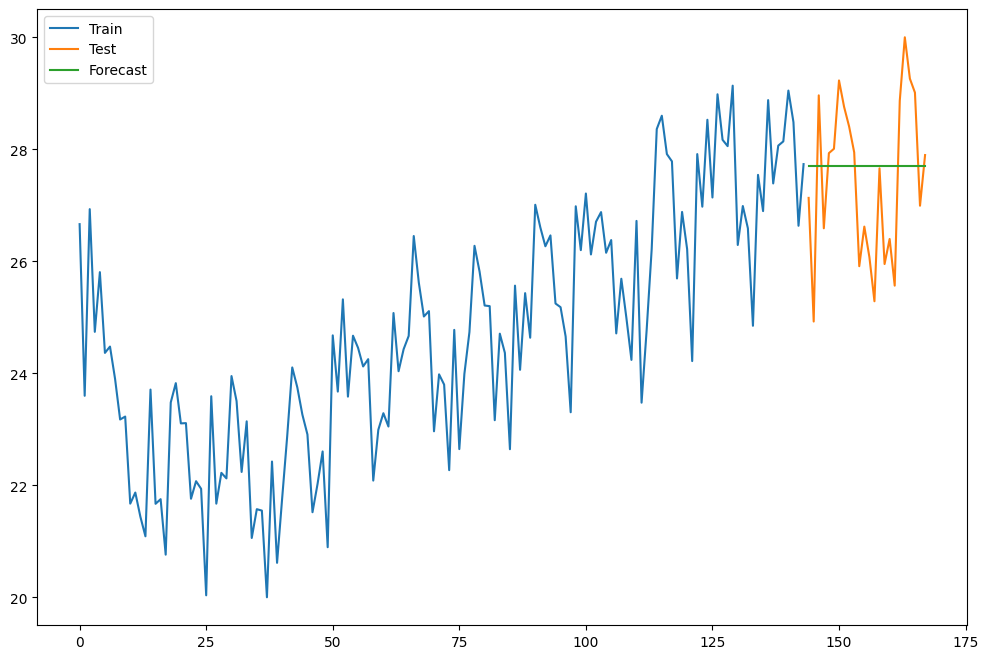

In [57]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat_avg.HoltWinter,label='Forecast')
plt.legend()

In [58]:
rms = sqrt(mean_squared_error(df_test.BirthRate,y_hat_avg.HoltWinter))
rms

1.4207643427210714

In [ ]:
#auto regressive integreted NA predicts itself

#in the sequence pdq
#central value of d meeans level of differencing.
#stationary time series -> where mean will not change(constant) and standard deviation is also same(constant).
4,8,5,9,6,8,7

level 1 ->
4,3,4,3,2,1

level 2 ->
1,1,1,1,1

#difference between two numbers without considering sign
if the original series is not stationary
this level 

# AD Fuller Test

- to check the stationary of a time series

In [59]:
#Ho -> the time series is not stationary
#Ha -> the time series is stationary

from statsmodels.tsa.stattools import adfuller
adfuller(df_train)

#since the p-value (0.972) is more than 0.05 so we do not stationary

(0.201716047916316,
 0.972357677757101,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 322.55907506392055)

In [60]:
#after first level of differencing
adfuller(df_train.diff().dropna())

(-4.2539049188587,
 0.000533337897888096,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 314.6470672927586)

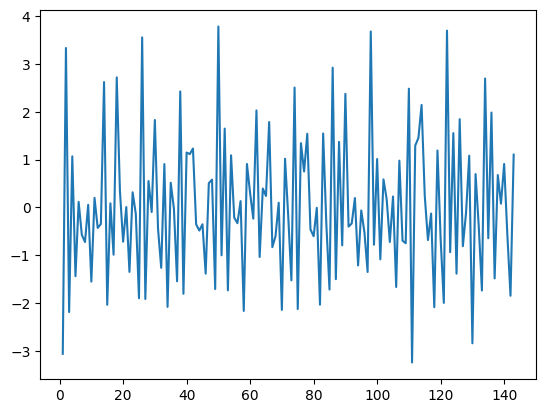

In [62]:
plt.plot(df_train.diff())

In [63]:
#for checking we can have second level of differencing
adfuller(df_train.diff().diff().dropna())

(-7.414679804135278,
 6.985733866858812e-11,
 14,
 127,
 {'1%': -3.482920063655088,
  '5%': -2.884580323367261,
  '10%': -2.5790575441750883},
 329.76423169855923)

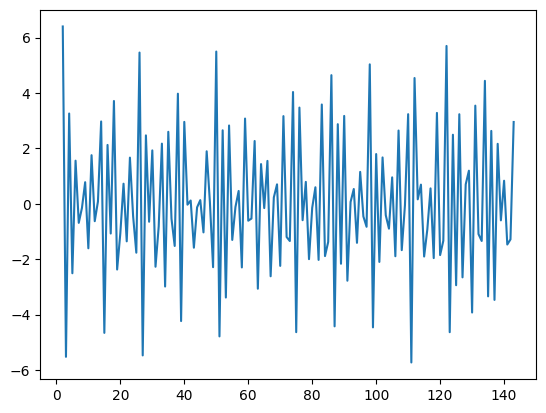

In [64]:
plt.plot(df_train.diff().diff())

In [ ]:
ACF - Auto Corelation Factor

- that actually gives value of q (plots) 3rd
- contineuos

PACF - Partial Auto Corelation Factor 
- that actually gives first value of p
- contineous

By a lag second series comes

Yt  Yt+1  Yt+2

4    
8    4     
5    8     4
9    5     8
6    9     5
8    6     9
7    8     6
     7     8
           7

In [65]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

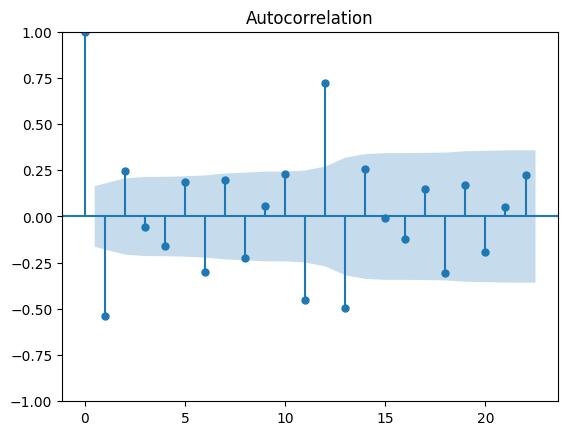

<Figure size 1200x800 with 0 Axes>

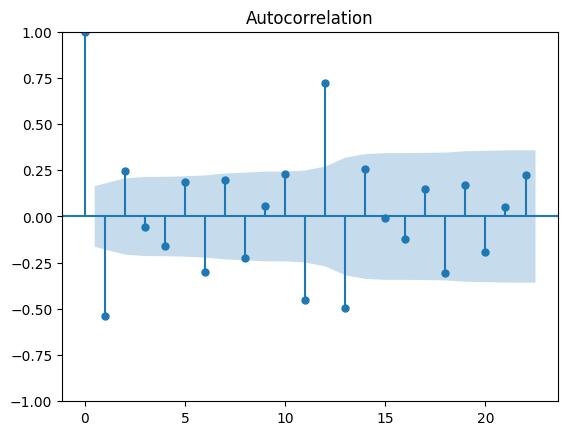

In [66]:
plt.figure(figsize=(12,8))
plot_acf(df_train.diff().dropna())

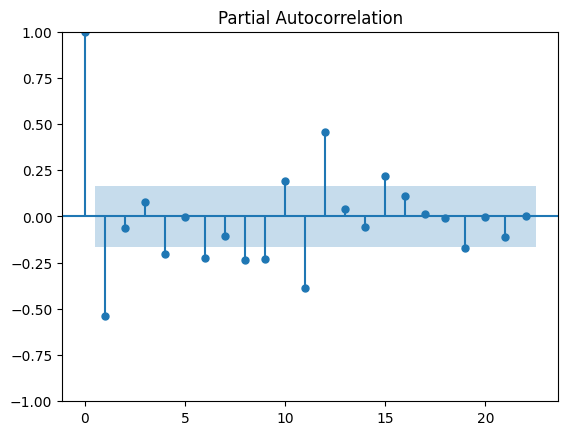

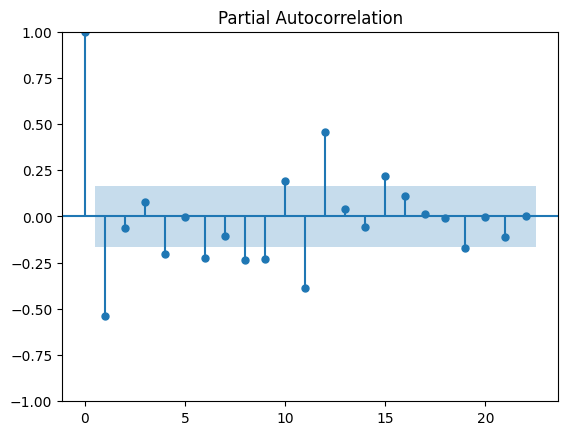

In [67]:
plot_pacf(df_train.diff().dropna())

In [ ]:
'''
d = 1 (level of differencing)
p = 1 (from PACF graph)
q = 2 (from ACF graph)
'''

In [68]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
mod4 = ARIMA(df_train,order=(1,1,2)).fit()

In [72]:
pred = mod4.predict(len(df_test))

In [73]:
pred

24     21.885210
25     21.960799
26     21.120354
27     21.567713
28     22.690214
         ...    
139    27.751642
140    28.047470
141    28.550314
142    28.815180
143    27.719059
Name: predicted_mean, Length: 120, dtype: float64

In [1]:
rms = sqrt(mean_squared_error(df_test.BirthRate,pred))
rms

In [2]:
len(df_test)

In [3]:
len(pred)